# **Exploratory Data Analysis**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

import pygwalker as pyg 

In [6]:
df0 = pd.read_csv("DATASETS/penguins_size.csv")
df = df0.copy()
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [7]:
df.tail()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe               NaN              NaN                NaN   
340  Gentoo  Biscoe              46.8             14.3              215.0   
341  Gentoo  Biscoe              50.4             15.7              222.0   
342  Gentoo  Biscoe              45.2             14.8              212.0   
343  Gentoo  Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
10/344

# missing values datamın %3'ne takabül ettiğinden drop ediyorum.

0.029069767441860465

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [14]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [16]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [17]:
unique_values(df, cat_features)

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [18]:
df[df["sex"]=="."]

# sex featurandaki yanlış kategorik veriyi tespit ediyoruz.

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [19]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [20]:
df.loc[336, "sex"] = "MALE"

In [21]:
df.loc[336, "sex"]

'MALE'

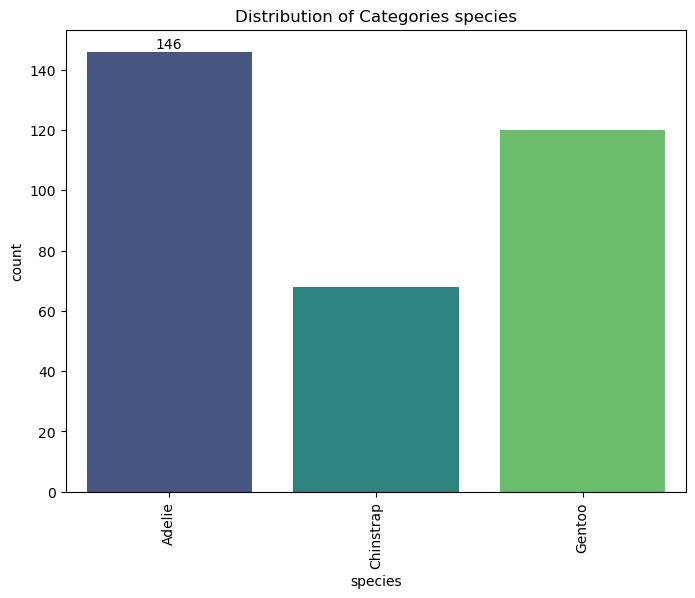

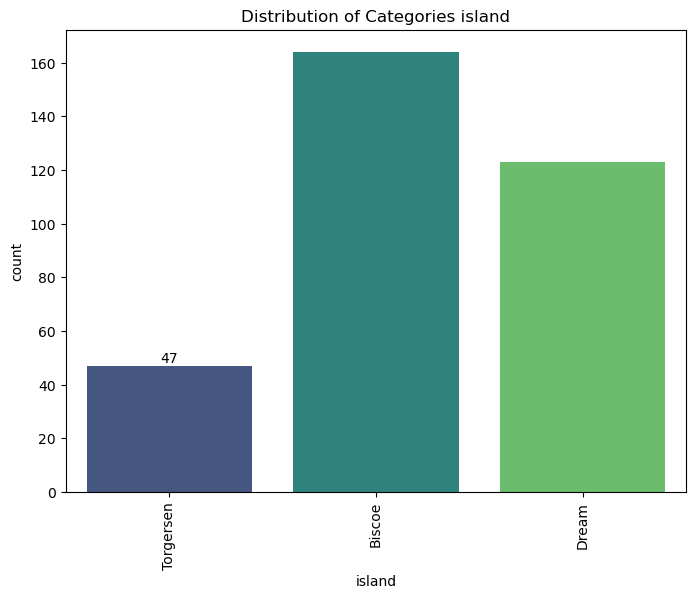

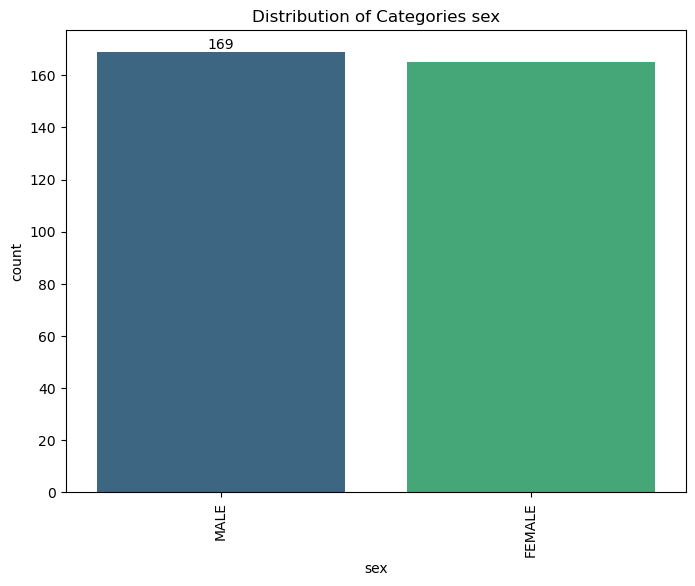

In [22]:
# Kategorik feature ların dağılımını göstermek için;

cat_features = df.select_dtypes(include='object').columns

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [23]:
df["species"].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

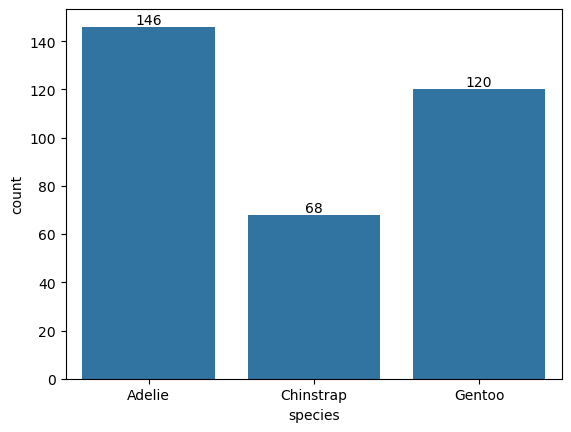

In [24]:
ax = sns.countplot(x="species", data=df)
ax.bar_label(ax.containers[0]);

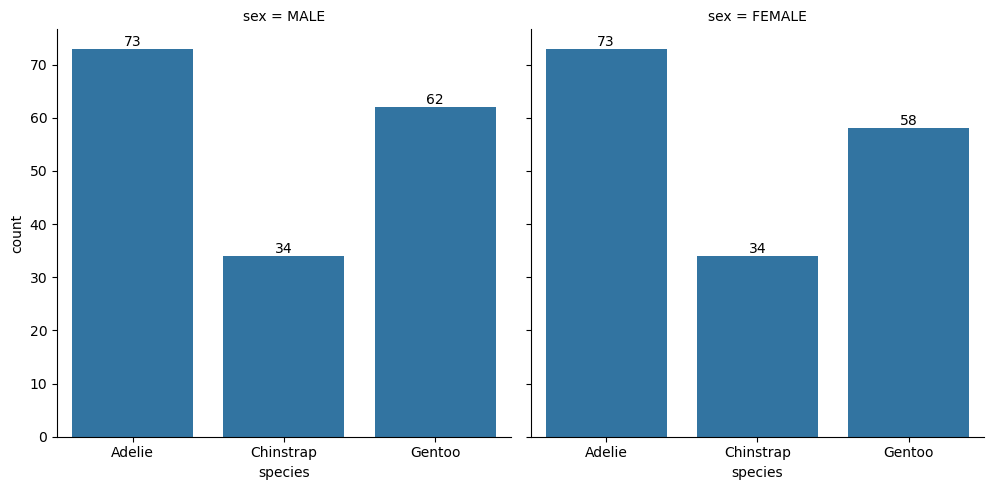

In [25]:
g = sns.catplot(x="species", data=df, kind="count", col="sex")

g.facet_axis(0, 0).bar_label(container=g.facet_axis(0, 0).containers[0])
g.facet_axis(0, 1).bar_label(container=g.facet_axis(0, 1).containers[0]);

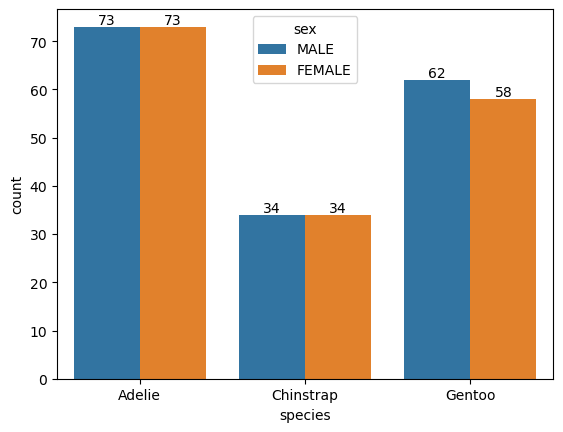

In [26]:
ax = sns.countplot(x="species", hue="sex", data=df)
for container in ax.containers:
    ax.bar_label(container)

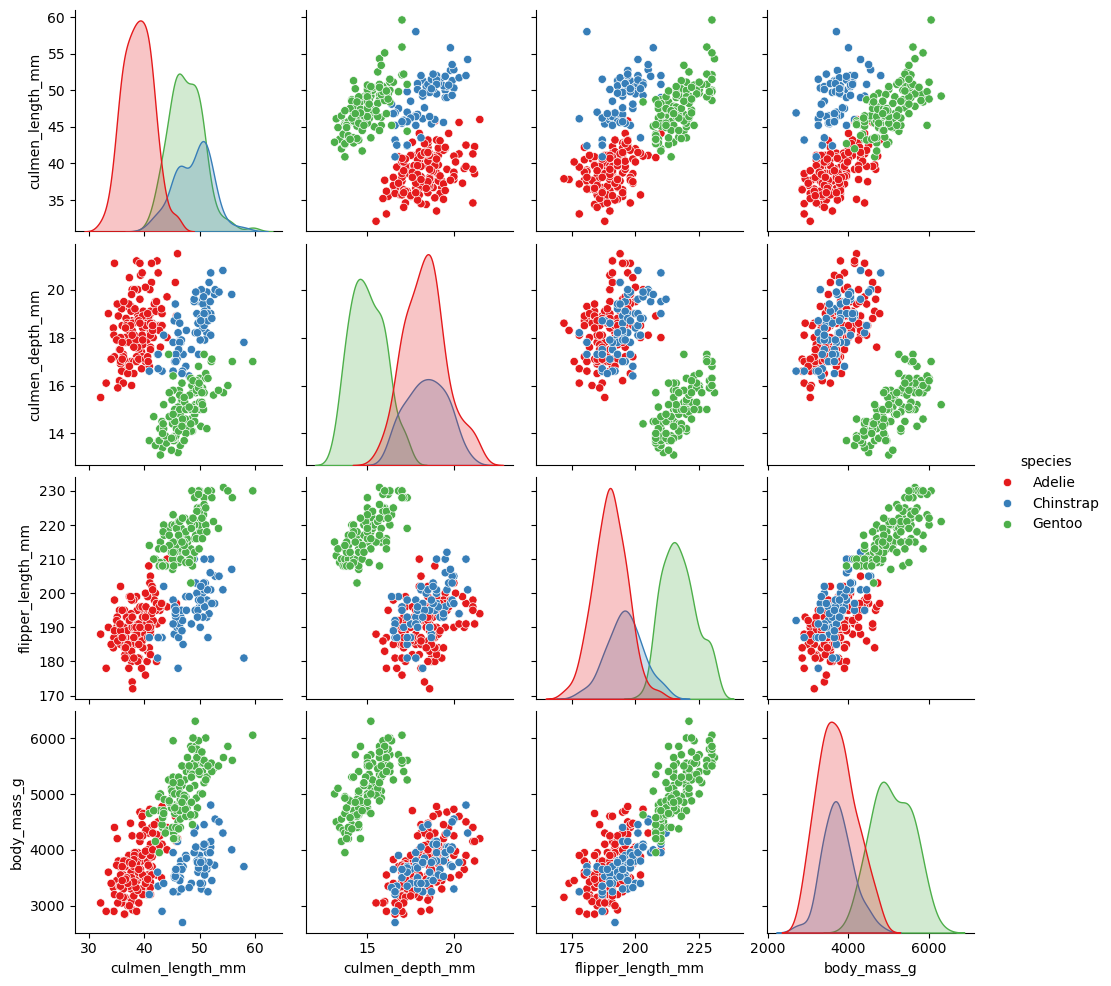

In [27]:
sns.pairplot(df, hue="species", palette="Set1");

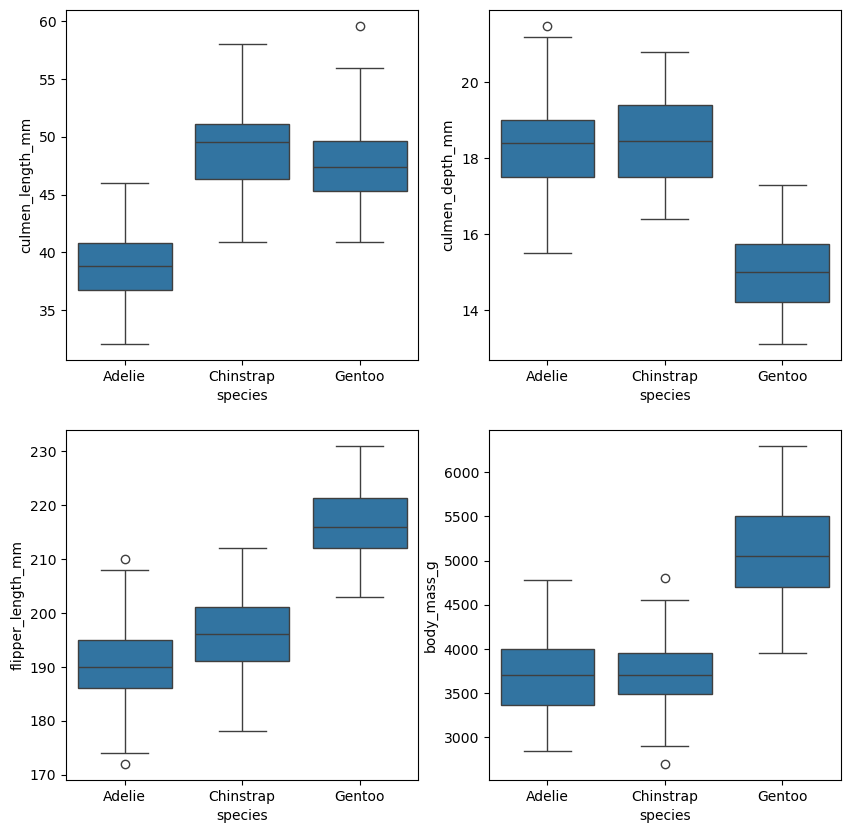

In [28]:
index = 0
plt.figure(figsize=(10, 10))
for feature in df.select_dtypes("number"):
    if feature != "species":
        index += 1
        plt.subplot(2, 2, index)
        sns.boxplot(x='species', y=feature, data=df)

In [29]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062162224ea5f8T1Vr5MbfN2d7WCh9" style="height: auto">\n    <hea…

In [30]:
num_features

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [31]:
df.select_dtypes("number")

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

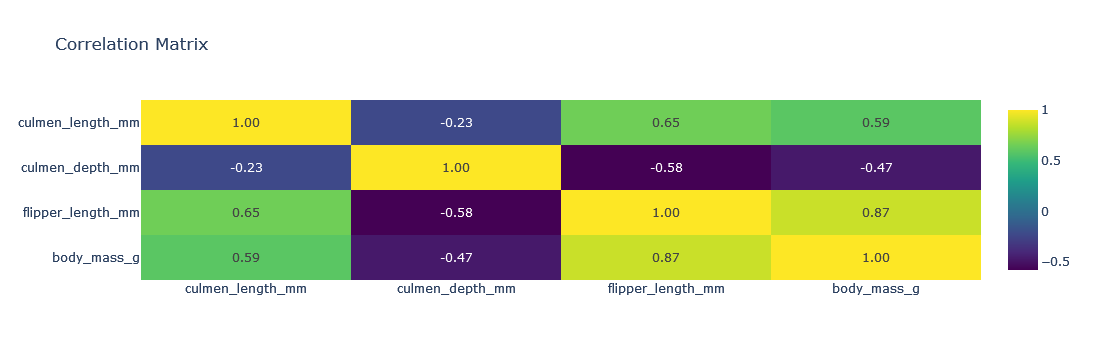

In [32]:
corr_matrix = df.select_dtypes("number").corr()

fig = px.imshow(corr_matrix, 
                text_auto='.2f',
                aspect="auto",
                color_continuous_scale='viridis',
                title="Correlation Matrix")

fig.show()

# tree based modeller için multicolinarity problem değildir. 

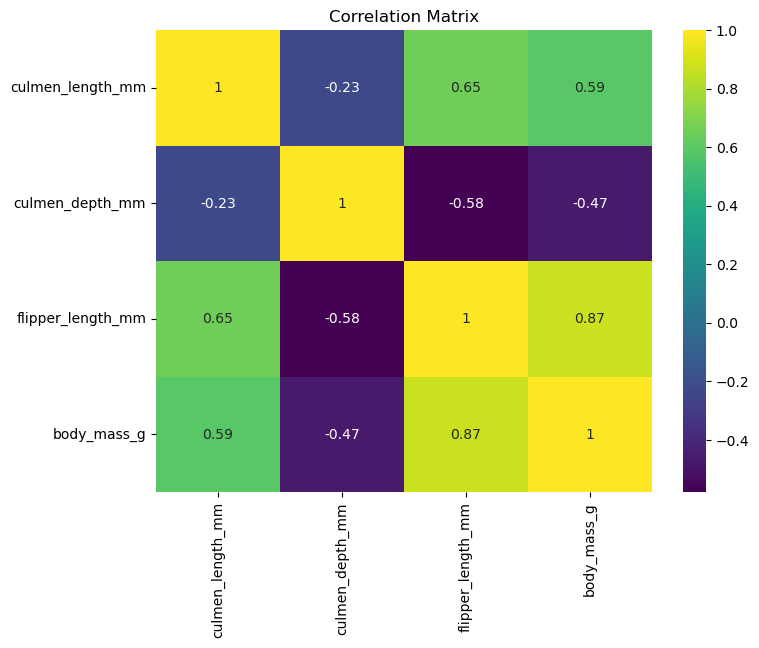

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

# **Modelling**

## Train | Test Split

# ***DENEME***

In [35]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [36]:
df.species.value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [37]:
df['species'] = df['species'].map({'Adelie': 1, 'Gentoo': 2, 'Chinstrap': 3})

# ***DENEME***

In [47]:
X = df.drop(columns="species")
y = df['species']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Ordinal Encoder

In [49]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [50]:
X_train[cat]

island     sex
17   Torgersen    MALE
19   Torgersen    MALE
124  Torgersen  FEMALE
100     Biscoe  FEMALE
41       Dream    MALE
..         ...     ...
122  Torgersen  FEMALE
180      Dream  FEMALE
213      Dream  FEMALE
278     Biscoe  FEMALE
342     Biscoe  FEMALE

[267 rows x 2 columns]

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
enc = OrdinalEncoder()
enc.fit_transform(X_train[cat])

array([[2., 1.],
       [2., 1.],
       [2., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.

In [53]:
X_train[cat] = enc.fit_transform(X_train[cat])
X_train[cat]

island  sex
17      2.0  1.0
19      2.0  1.0
124     2.0  0.0
100     0.0  0.0
41      1.0  1.0
..      ...  ...
122     2.0  0.0
180     1.0  0.0
213     1.0  0.0
278     0.0  0.0
342     0.0  0.0

[267 rows x 2 columns]

In [54]:
X_test[cat] = enc.transform(X_test[cat])
X_test[cat]

island  sex
13      2.0  1.0
196     1.0  0.0
216     1.0  0.0
121     2.0  1.0
289     0.0  1.0
..      ...  ...
158     1.0  0.0
249     0.0  1.0
282     0.0  0.0
81      2.0  1.0
272     0.0  0.0

[67 rows x 2 columns]

In [55]:
X_test.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
13      2.0              38.6             21.2              191.0   
196     1.0              50.9             17.9              196.0   
216     1.0              43.5             18.1              202.0   
121     2.0              37.7             19.8              198.0   
289     0.0              50.7             15.0              223.0   

     body_mass_g  sex  
13        3800.0  1.0  
196       3675.0  0.0  
216       3400.0  0.0  
121       3500.0  1.0  
289       5550.0  1.0

## Modelling with Pipeline & ColumnTransformer

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [57]:
X_train.sample(3)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
97   Dream              40.3             18.5              196.0       4350.0   
140  Dream              40.2             17.1              193.0       3400.0   
30   Dream              39.5             16.7              178.0       3250.0   

        sex  
97     MALE  
140  FEMALE  
30   FEMALE

In [58]:
X_test.sample(3)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
163  Dream              51.7             20.3              194.0       3775.0   
209  Dream              49.3             19.9              203.0       4050.0   
39   Dream              39.8             19.1              184.0       4650.0   

      sex  
163  MALE  
209  MALE  
39   MALE

In [59]:
from sklearn.compose import make_column_transformer

In [60]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [61]:
pd.DataFrame(column_trans.fit_transform(X_train))

0    1     2     3      4       5
0    2.0  1.0  42.5  20.7  197.0  4500.0
1    2.0  1.0  46.0  21.5  194.0  4200.0
2    2.0  0.0  35.2  15.9  186.0  3050.0
3    0.0  0.0  35.0  17.9  192.0  3725.0
4    1.0  1.0  40.8  18.4  195.0  3900.0
..   ...  ...   ...   ...    ...     ...
262  2.0  0.0  40.2  17.0  176.0  3450.0
263  1.0  0.0  46.4  17.8  191.0  3700.0
264  1.0  0.0  46.8  16.5  189.0  3650.0
265  0.0  0.0  43.2  14.5  208.0  4450.0
266  0.0  0.0  45.2  14.8  212.0  5200.0

[267 rows x 6 columns]

In [62]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        1  Torgersen              39.1             18.7              181.0   
1        1  Torgersen              39.5             17.4              186.0   
2        1  Torgersen              40.3             18.0              195.0   
4        1  Torgersen              36.7             19.3              193.0   
5        1  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance

In [65]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

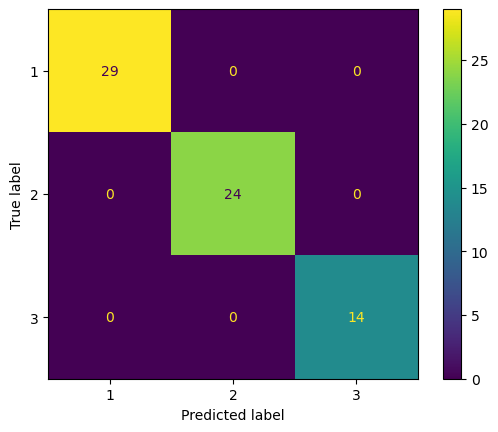

In [66]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

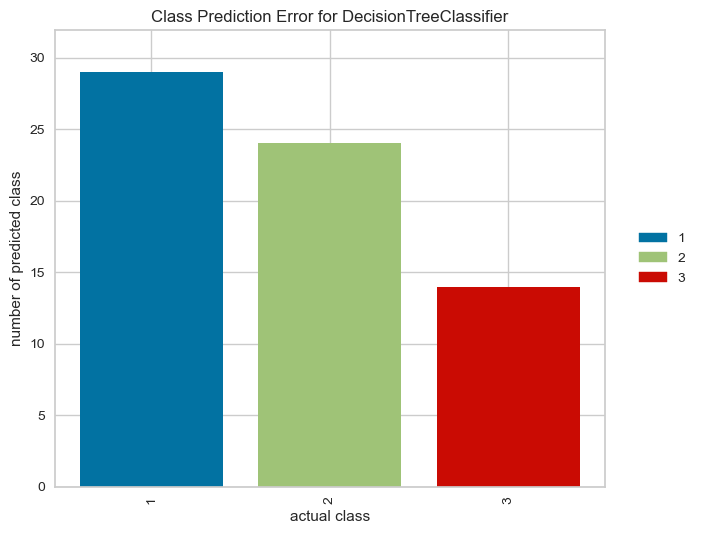

In [67]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [68]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 24  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



## Cross Validation & Evaluating ROC and AUC

In [69]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.977493
train_accuracy           1.000000
test_precision_micro     0.977493
train_precision_micro    1.000000
test_recall_micro        0.977493
train_recall_micro       1.000000
test_f1_micro            0.977493
train_f1_micro           1.000000
dtype: float64

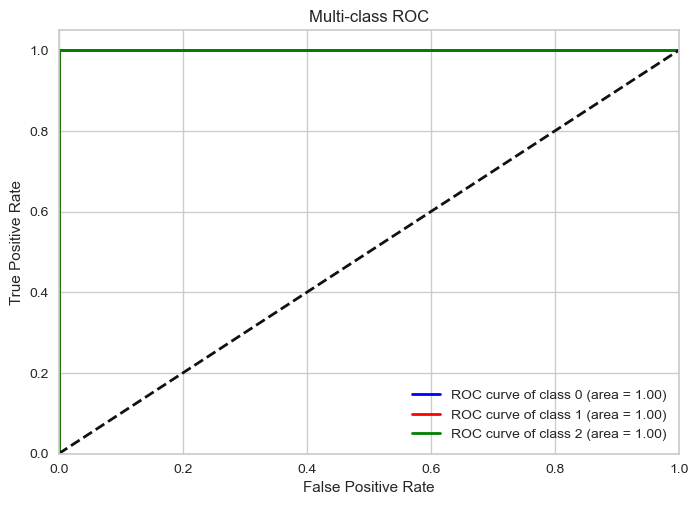

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

model.fit(X_train, y_train)

# Hedef değişkeni ikili formata dönüştürüyoruz
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Tahmin olasılıklarını alıyoruz
y_pred_proba = model.predict_proba(X_test)

# Her sınıf için ROC eğrisi ve AUC hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çiziyoruz
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [71]:
pipe_model["DT_model"].feature_importances_ # DT_model.feature_importances_

array([0.03805226, 0.02348905, 0.34971522, 0.06856954, 0.51430167,
       0.00587226])

In [72]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [73]:
X_train.head(1)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
17  Torgersen              42.5             20.7              197.0   

    body_mass_g   sex  
17       4500.0  MALE

In [74]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=features).head()

ordinalencoder__island  ordinalencoder__sex  remainder__culmen_length_mm  \
0                     2.0                  1.0                         42.5   
1                     2.0                  1.0                         46.0   
2                     2.0                  0.0                         35.2   
3                     0.0                  0.0                         35.0   
4                     1.0                  1.0                         40.8   

   remainder__culmen_depth_mm  remainder__flipper_length_mm  \
0                        20.7                         197.0   
1                        21.5                         194.0   
2                        15.9                         186.0   
3                        17.9                         192.0   
4                        18.4                         195.0   

   remainder__body_mass_g  
0                  4500.0  
1                  4200.0  
2                  3050.0  
3                  3725.0  
4                  3900.0

In [75]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [76]:
df_fi = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, index=new_features, #index=X.columns
                      columns = ["Feature Importance"])
df_fi = df_fi.sort_values("Feature Importance", ascending=False)

df_fi

Feature Importance
flipper_length_mm            0.514302
culmen_length_mm             0.349715
culmen_depth_mm              0.068570
island                       0.038052
sex                          0.023489
body_mass_g                  0.005872

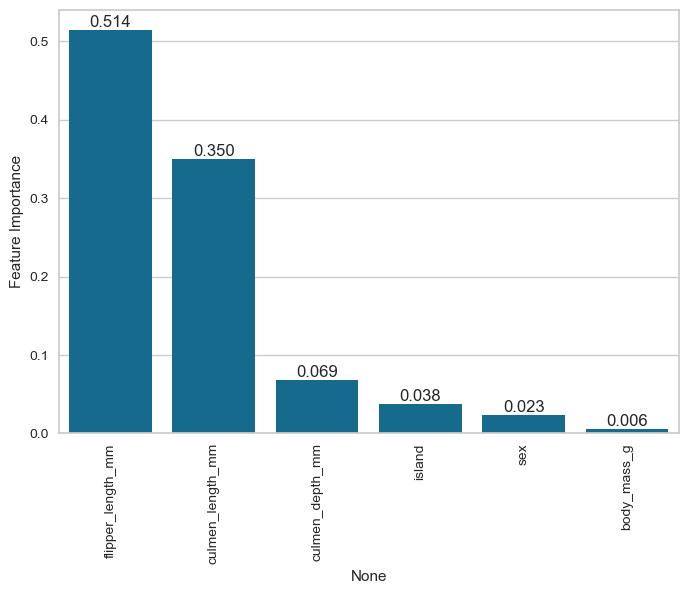

In [77]:
ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.show();

In [78]:
X2 = X.drop(columns=["flipper_length_mm"])

In [79]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [80]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [81]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28  0  1]
 [ 0 19  0]
 [ 1  0 18]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00        19
           3       0.95      0.95      0.95        19

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67


Train_Set
[[117   0   0]
 [  0 101   0]
 [  0   0  49]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00        49

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [82]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.9849
train_accuracy           1.0000
test_precision_micro     0.9849
train_precision_micro    1.0000
test_recall_micro        0.9849
train_recall_micro       1.0000
test_f1_micro            0.9849
train_f1_micro           1.0000
dtype: float64

> ***Bütün feature'lar var iken alınan skorlar:***
>
> 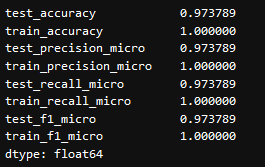

In [83]:
decision_tree_model = pipe_model2.named_steps["DT_model"]

feature_importances = decision_tree_model.feature_importances_

df2_fi = pd.DataFrame(data=feature_importances, index=X_train2.columns, columns=["Feature Importance"])

df2_fi = df2_fi.sort_values(by="Feature Importance", ascending=False)

df2_fi

Feature Importance
culmen_depth_mm             0.501557
island                      0.431050
body_mass_g                 0.057899
sex                         0.009494
culmen_length_mm            0.000000

> ***Bütün feature'lar var iken feature importance sonuçları:***
>
> 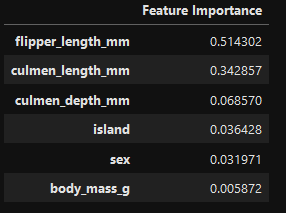

In [84]:
def get_feature_importances(model, features):
    feature_importances = model.feature_importances_
    
    df_feature_importances = pd.DataFrame(data=feature_importances, index=features, columns=["Feature Importance"])
    
    # Özellik önemlerine göre sıralayın
    df_feature_importances = df_feature_importances.sort_values(by="Feature Importance", ascending=False)
    
    return df_feature_importances

df_feature_importances_model2 = get_feature_importances(pipe_model2.named_steps["DT_model"], X_train2.columns)

df_feature_importances_model = get_feature_importances(pipe_model.named_steps["DT_model"], new_features)

print("Model 2 için Özellik Önemleri:")
print(df_feature_importances_model2)

print("\nModel 1 için Özellik Önemleri:")
print(df_feature_importances_model)

Model 2 için Özellik Önemleri:
                  Feature Importance
culmen_depth_mm             0.501557
island                      0.431050
body_mass_g                 0.057899
sex                         0.009494
culmen_length_mm            0.000000

Model 1 için Özellik Önemleri:
                   Feature Importance
flipper_length_mm            0.514302
culmen_length_mm             0.349715
culmen_depth_mm              0.068570
island                       0.038052
sex                          0.023489
body_mass_g                  0.005872


## Score Evaluation in Multiclass Datasets

In [85]:
from sklearn.metrics import make_scorer

In [91]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=[1]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =[1]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = [1]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=[2]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=[2]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=[2]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=[3]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = [3]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = [3]),
          
          }

In [92]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie        0.992308
train_precision-Adelie       1.000000
test_recall-Adelie           0.973485
train_recall-Adelie          1.000000
test_f1-Adelie               0.981652
train_f1-Adelie              1.000000
test_precision-Chinstrap     0.983333
train_precision-Chinstrap    1.000000
test_recall-Chinstrap        0.990000
train_recall-Chinstrap       1.000000
test_f1-Chinstrap            0.985646
train_f1-Chinstrap           1.000000
test_precision-Gentoo        0.983333
train_precision-Gentoo       1.000000
test_recall-Gentoo           1.000000
train_recall-Gentoo          1.000000
test_f1-Gentoo               0.990909
train_f1-Gentoo              1.000000
dtype: float64

## Visualize the Tree

In [93]:
from sklearn.tree import plot_tree

In [102]:
y

0      1
1      1
2      1
4      1
5      1
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 334, dtype: int64

In [103]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    # plot_tree(model["DT_model"], filled=True, feature_names=new_features, class_names = y.unique().tolist(), fontsize=10)
    plot_tree(model["DT_model"], filled=True, feature_names=new_features, class_names = list(map(str, y.unique().tolist())), fontsize=10);

## Understanding and Evaluating Hyperparameters in Decision Trees

### max_depth & Pruned Tree

In [104]:
DT_model = DecisionTreeClassifier(max_depth=3, random_state=101) # default max_dept=None
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=3, random_state=101))])



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  0 12]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        24
           3       1.00      0.86      0.92        14

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[116   0   1]
 [  0  95   1]
 [  4   0  50]]


              precision    recall  f1-score   support

           1       0.97      0.99      0.98       117
           2       1.00      0.99      0.99        96
           3       0.96      0.93      0.94        54

    accuracy                           0.98       267
   macro avg       0.98      0.97      0.97       267
weighted avg       0.98      0.98      0.98       267



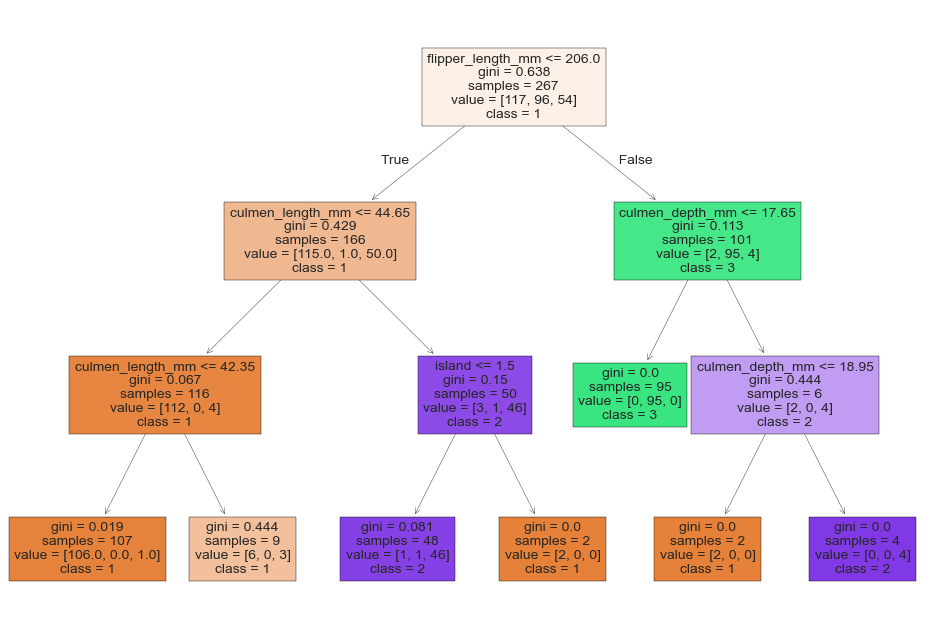

In [105]:
report_model(pruned_tree)

In [106]:
DT_model = DecisionTreeClassifier(max_depth=2, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree2 = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree2.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=2, random_state=101))])



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  0 12]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        24
           3       1.00      0.86      0.92        14

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[112   0   5]
 [  0  95   1]
 [  4   0  50]]


              precision    recall  f1-score   support

           1       0.97      0.96      0.96       117
           2       1.00      0.99      0.99        96
           3       0.89      0.93      0.91        54

    accuracy                           0.96       267
   macro avg       0.95      0.96      0.96       267
weighted avg       0.96      0.96      0.96       267



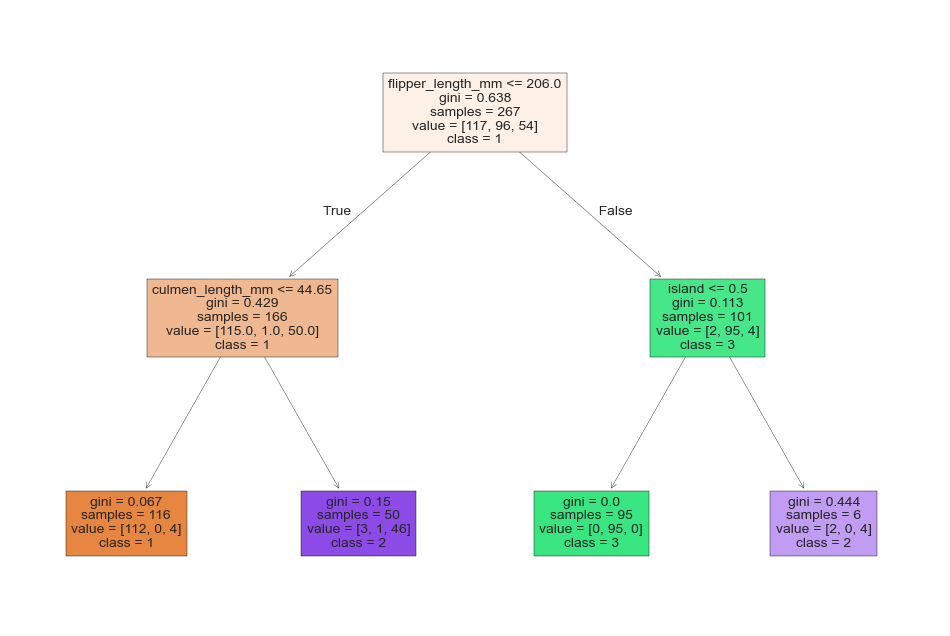

In [107]:
report_model(pruned_tree2)

In [108]:
DT_model = DecisionTreeClassifier(random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree3 = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree3.fit(X_train,y_train) 

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 0  0 14]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



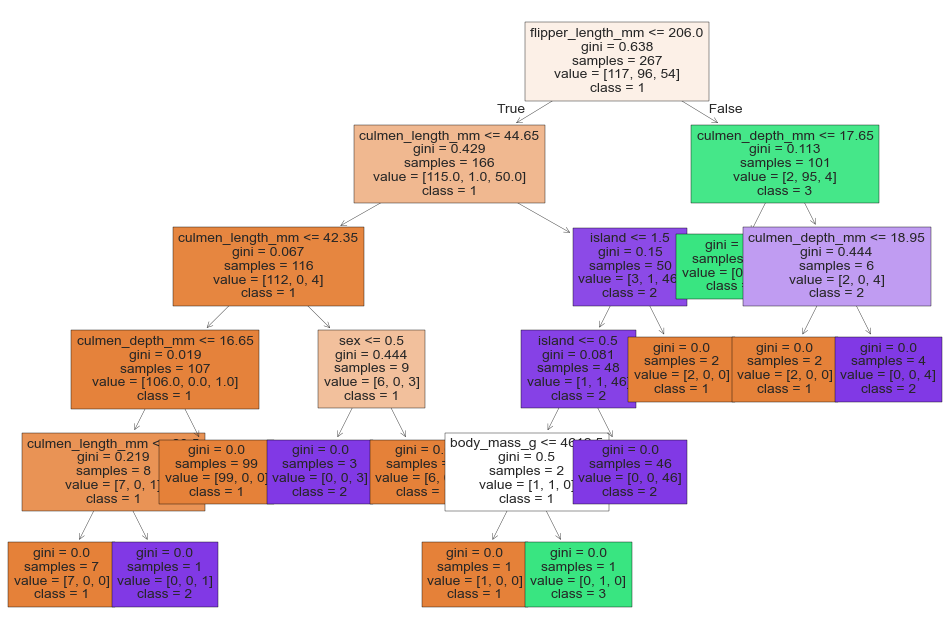

In [109]:
report_model(pruned_tree3)

### min_samples_split



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  0 12]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        24
           3       1.00      0.86      0.92        14

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[115   0   2]
 [  1  95   0]
 [  4   0  50]]


              precision    recall  f1-score   support

           1       0.96      0.98      0.97       117
           2       1.00      0.99      0.99        96
           3       0.96      0.93      0.94        54

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



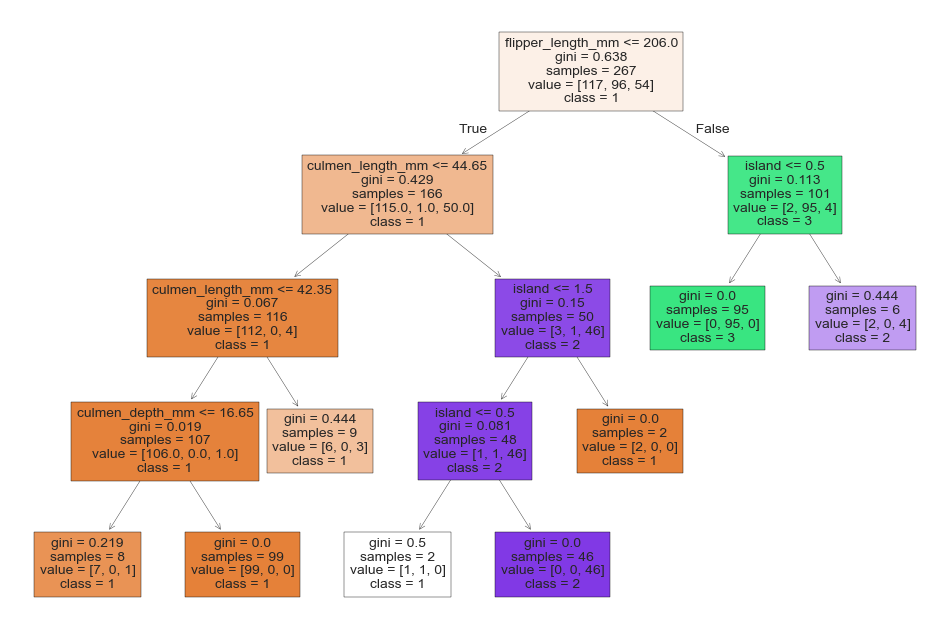

In [110]:
DT_model = DecisionTreeClassifier(min_samples_split=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 0  0 14]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[115   0   2]
 [  1  95   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       0.99      0.98      0.99       117
           2       1.00      0.99      0.99        96
           3       0.96      1.00      0.98        54

    accuracy                           0.99       267
   macro avg       0.99      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267



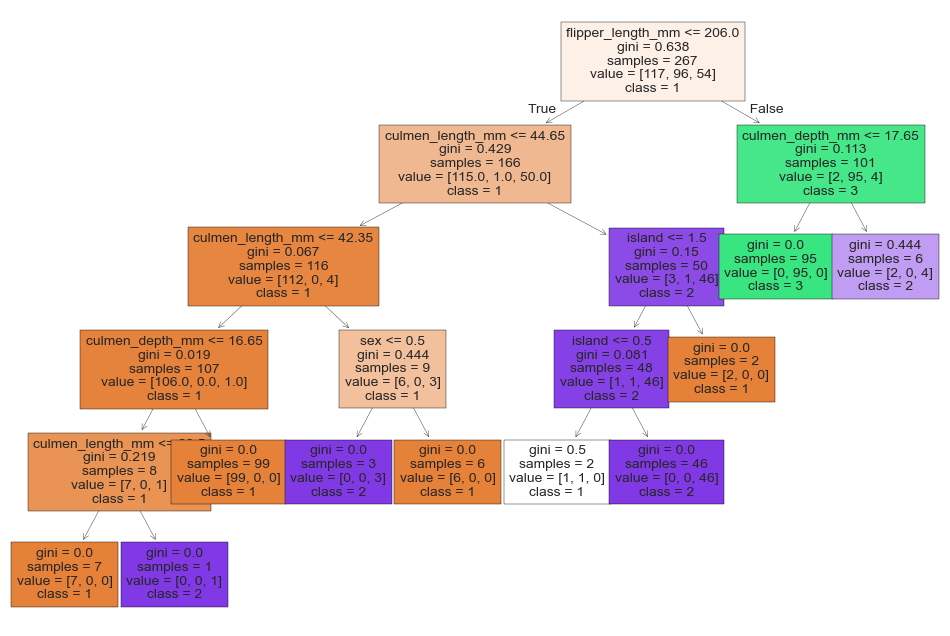

In [111]:
DT_model = DecisionTreeClassifier(min_samples_split=7, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)

### min_samples_leaf



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  1 11]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       0.96      1.00      0.98        24
           3       1.00      0.79      0.88        14

    accuracy                           0.96        67
   macro avg       0.97      0.93      0.94        67
weighted avg       0.96      0.96      0.95        67



Train Set
[[112   2   3]
 [  0  95   1]
 [  4   4  46]]


              precision    recall  f1-score   support

           1       0.97      0.96      0.96       117
           2       0.94      0.99      0.96        96
           3       0.92      0.85      0.88        54

    accuracy                           0.95       267
   macro avg       0.94      0.93      0.94       267
weighted avg       0.95      0.95      0.95       267



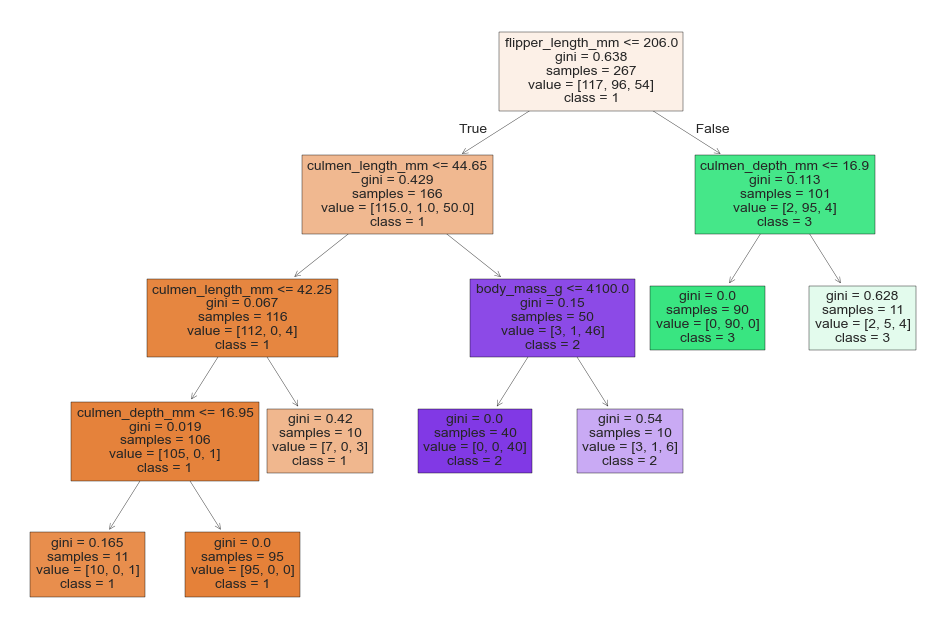

In [112]:
DT_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  0 12]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        24
           3       1.00      0.86      0.92        14

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[115   0   2]
 [  1  95   0]
 [  5   0  49]]


              precision    recall  f1-score   support

           1       0.95      0.98      0.97       117
           2       1.00      0.99      0.99        96
           3       0.96      0.91      0.93        54

    accuracy                           0.97       267
   macro avg       0.97      0.96      0.96       267
weighted avg       0.97      0.97      0.97       267



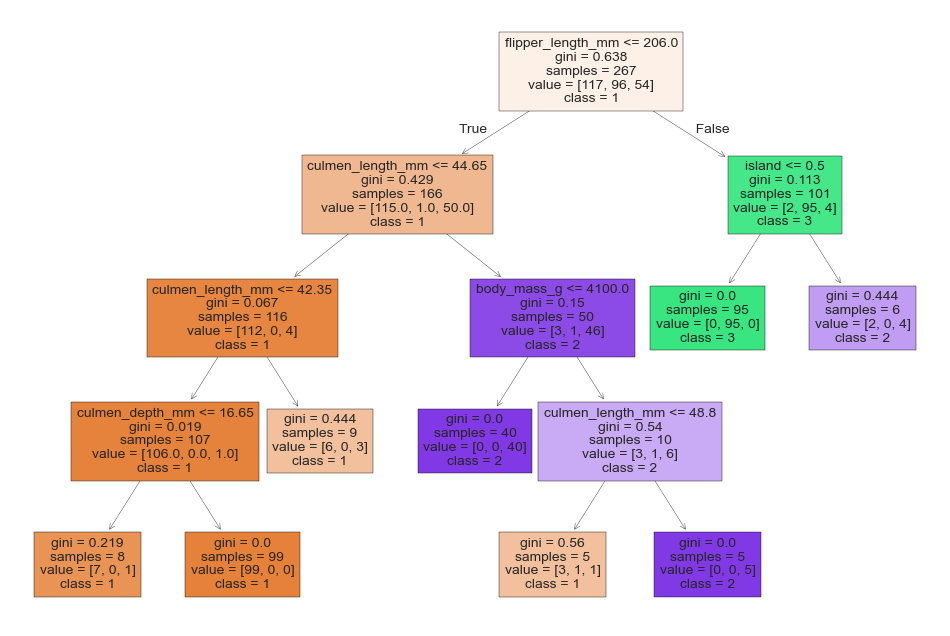

In [113]:
DT_model = DecisionTreeClassifier(min_samples_leaf=5, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)

### max_leaf_nodes



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  0 12]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        24
           3       1.00      0.86      0.92        14

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[117   0   0]
 [  1  95   0]
 [  4   0  50]]


              precision    recall  f1-score   support

           1       0.96      1.00      0.98       117
           2       1.00      0.99      0.99        96
           3       1.00      0.93      0.96        54

    accuracy                           0.98       267
   macro avg       0.99      0.97      0.98       267
weighted avg       0.98      0.98      0.98       267



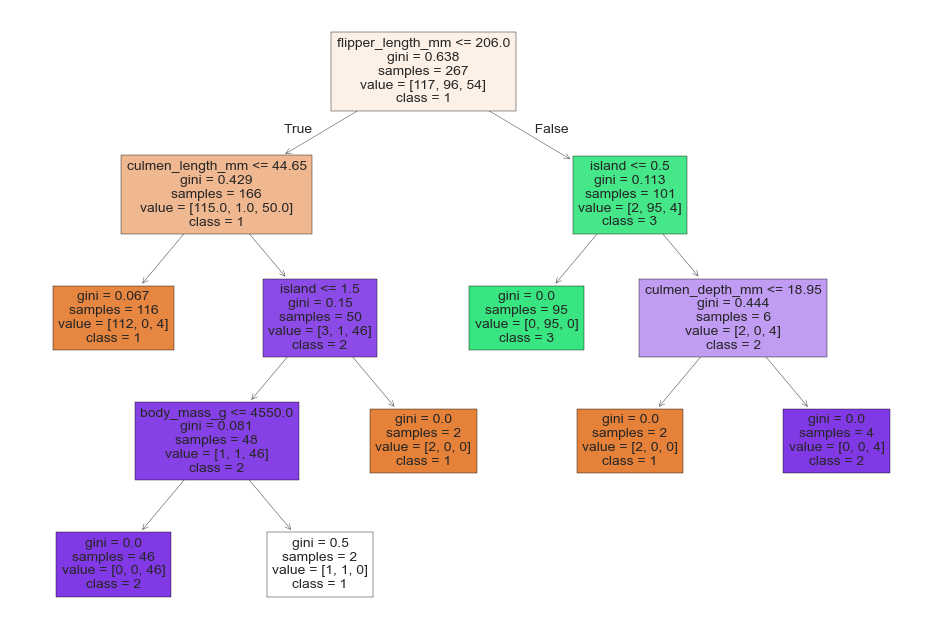

In [114]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)
tree.fit(X_train,y_train)

report_model(tree)



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 2  0 12]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        24
           3       1.00      0.86      0.92        14

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[112   0   5]
 [  0  95   1]
 [  4   0  50]]


              precision    recall  f1-score   support

           1       0.97      0.96      0.96       117
           2       1.00      0.99      0.99        96
           3       0.89      0.93      0.91        54

    accuracy                           0.96       267
   macro avg       0.95      0.96      0.96       267
weighted avg       0.96      0.96      0.96       267



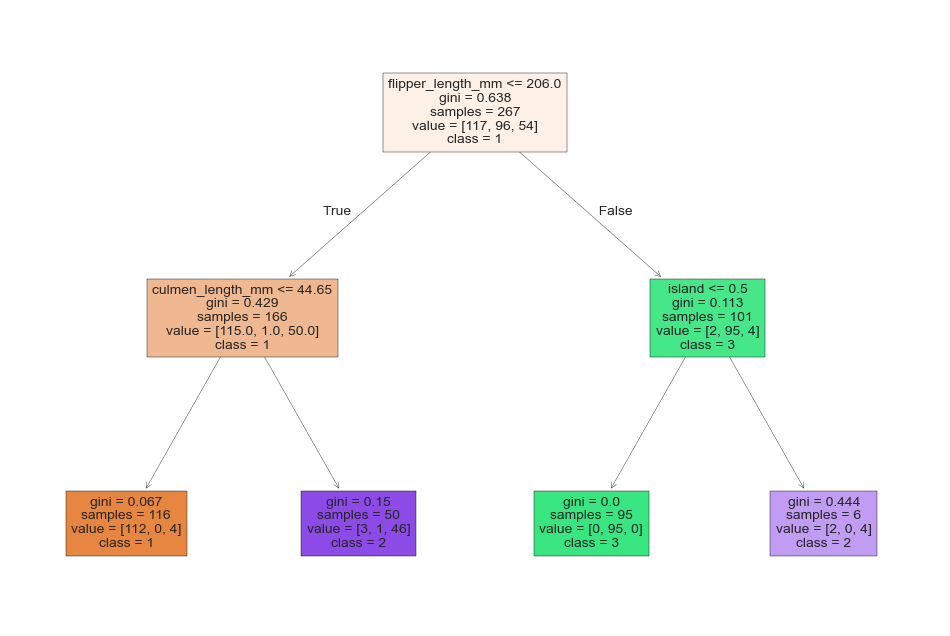

In [115]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=4, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)
tree.fit(X_train,y_train)

report_model(tree)

### splitter



Test Set
[[28  0  1]
 [ 0 24  0]
 [ 1  0 13]]


              precision    recall  f1-score   support

           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00        24
           3       0.93      0.93      0.93        14

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



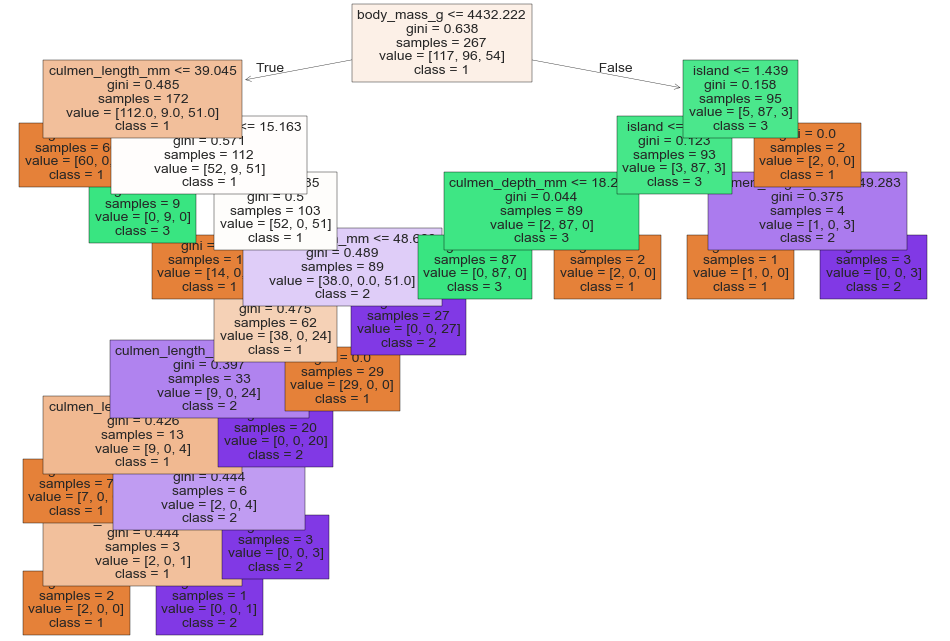

In [116]:
DT_model = DecisionTreeClassifier(splitter = "random")
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)



Test Set
[[28  0  1]
 [ 0 24  0]
 [ 1  0 13]]


              precision    recall  f1-score   support

           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00        24
           3       0.93      0.93      0.93        14

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



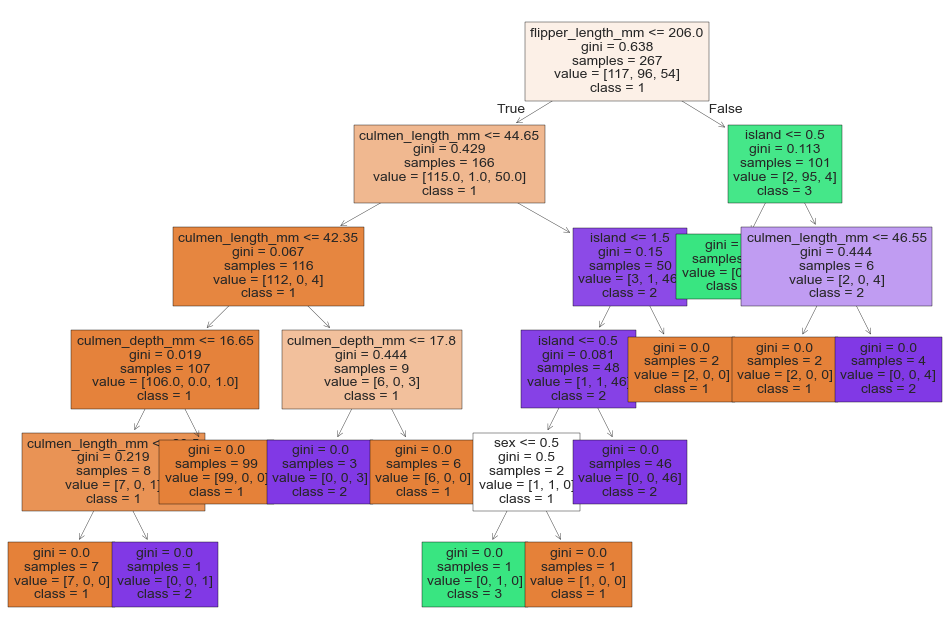

In [117]:
DT_model = DecisionTreeClassifier(splitter = "best")
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

### max_features



Test Set
[[28  1  0]
 [ 2 22  0]
 [ 0  0 14]]


              precision    recall  f1-score   support

           1       0.93      0.97      0.95        29
           2       0.96      0.92      0.94        24
           3       1.00      1.00      1.00        14

    accuracy                           0.96        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.96      0.96      0.96        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



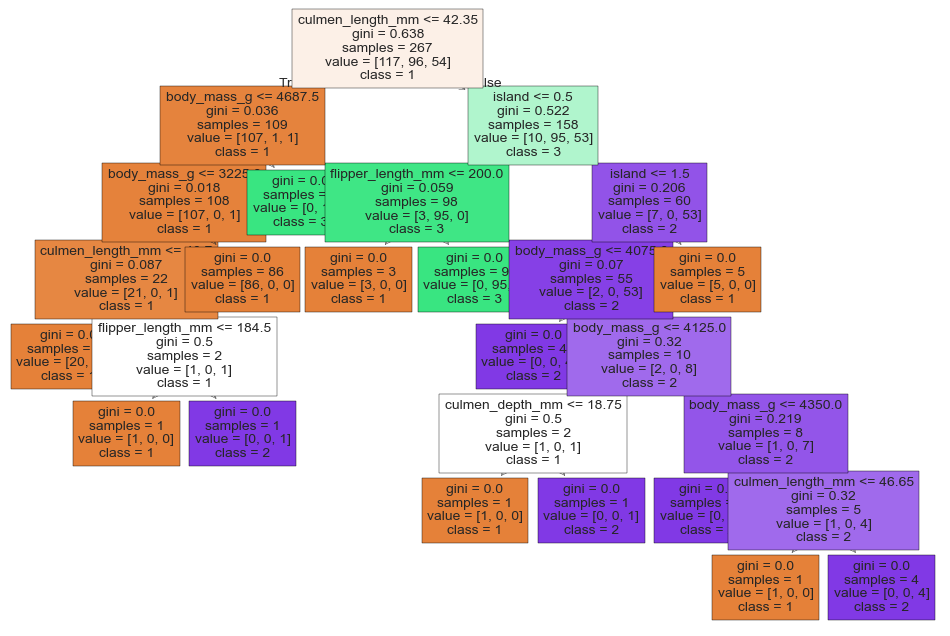

In [118]:
DT_model = DecisionTreeClassifier(splitter='best', max_features=3)

# Yukarıdaki kodun özeti:
# max_featres 3 olduğu için her bir bölünmede sorgusu yapılmak için 3 adet feature belirlenir. Ve splitter best olduğu için, bu 3 feature arasında en iyisi hangisiyse o seçilir. 

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)



Test Set
[[28  0  1]
 [ 0 24  0]
 [ 5  0  9]]


              precision    recall  f1-score   support

           1       0.85      0.97      0.90        29
           2       1.00      1.00      1.00        24
           3       0.90      0.64      0.75        14

    accuracy                           0.91        67
   macro avg       0.92      0.87      0.88        67
weighted avg       0.91      0.91      0.91        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



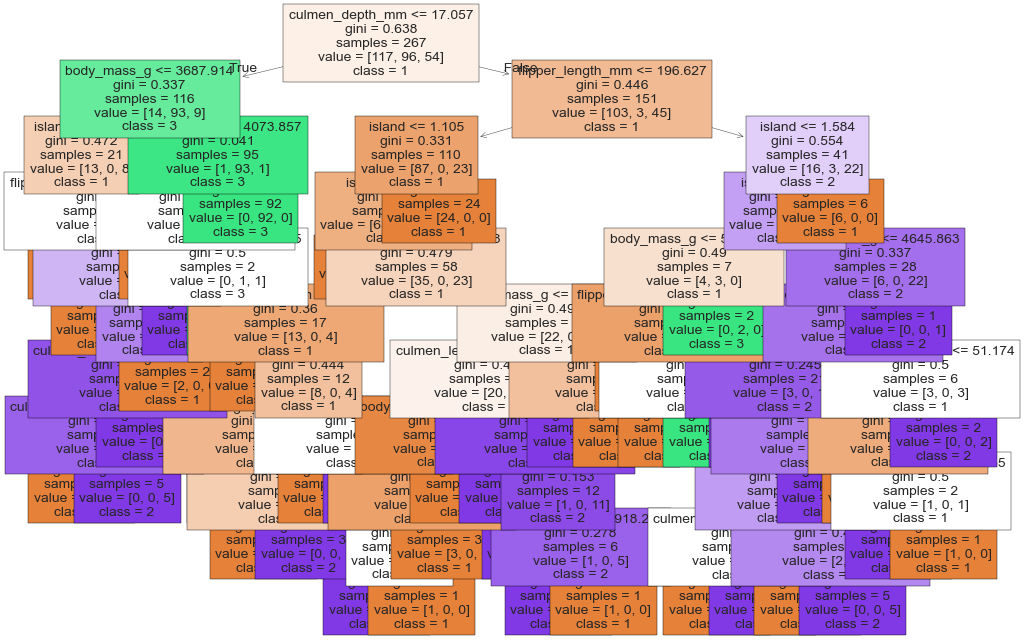

In [119]:
DT_model = DecisionTreeClassifier(splitter='random', max_features=3)

# Yukarıdaki kodun özeti:
# max_featres 3 olduğu için her bir bölünmede sorgusu yapılmak için 3 adet feature belirlenir. Ve splitter random olduğu için, bu 3 feature arasında tamamen random bir seçim yapar. 

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

### criterion



Test Set
[[27  1  1]
 [ 0 24  0]
 [ 1  0 13]]


              precision    recall  f1-score   support

           1       0.96      0.93      0.95        29
           2       0.96      1.00      0.98        24
           3       0.93      0.93      0.93        14

    accuracy                           0.96        67
   macro avg       0.95      0.95      0.95        67
weighted avg       0.96      0.96      0.95        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



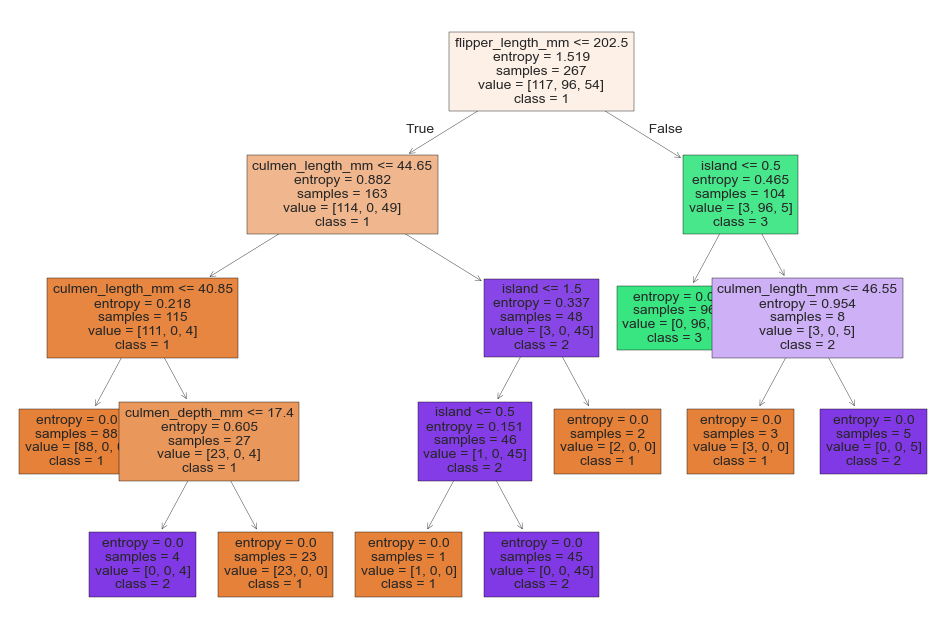

In [120]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)



Test Set
[[29  0  0]
 [ 0 24  0]
 [ 0  0 14]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



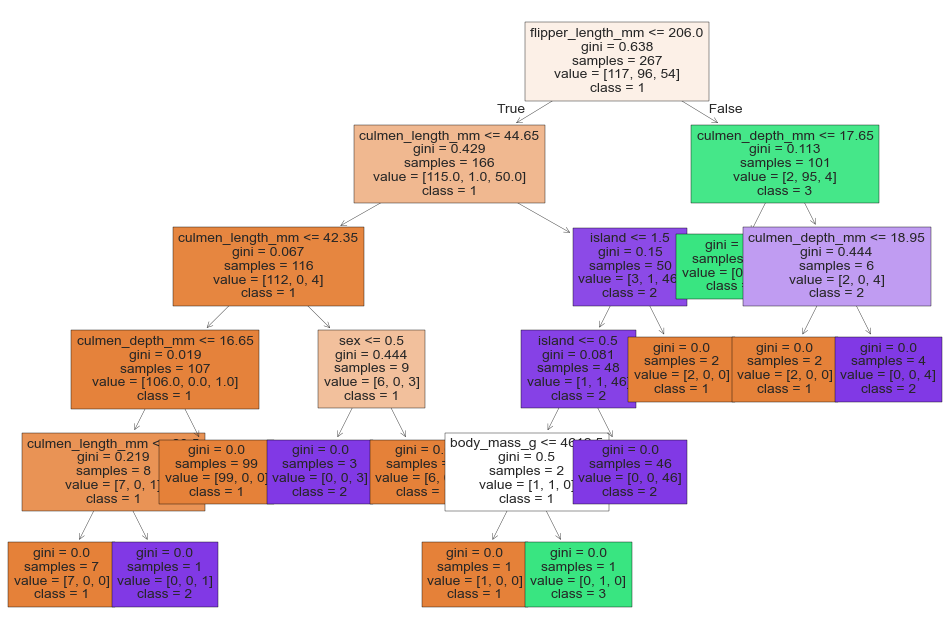

In [121]:
DT_model = DecisionTreeClassifier(criterion='gini', random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)

## Find Best Parameters

In [122]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [123]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 4,5,6,7],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [124]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro', #f1_micro ile accuracy veya diğerleri aynı sonucu verecektir
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [125]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [126]:
grid_model.best_index_

493

In [127]:
pd.DataFrame(grid_model.cv_results_).loc[493, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.996154
mean_train_score     0.99917
Name: 493, dtype: object

In [128]:
grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': 4,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 3,
 'DT_model__splitter': 'random'}

In [129]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_features=4, min_samples_split=3,
                                        random_state=101, splitter='random'))])

In [130]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[27  1  1]
 [ 1 18  0]
 [ 1  0 18]]
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        29
           2       0.95      0.95      0.95        19
           3       0.95      0.95      0.95        19

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67


Train_Set
[[117   0   0]
 [  0 101   0]
 [  0   0  49]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00        49

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [131]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 24  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  96   0]
 [  0   0  54]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        54

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [132]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeClassifier(max_features=4,
                                      min_samples_split=3,
                                      random_state=101,
                                      splitter='random'))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.996154
train_accuracy           0.999170
test_precision_micro     0.996154
train_precision_micro    0.999170
test_recall_micro        0.996154
train_recall_micro       0.999170
test_f1_micro            0.996154
train_f1_micro           0.999170
dtype: float64

# **Final Model & Prediction**

In [133]:
X = df.drop(columns=["species", "flipper_length_mm"])
y = df['species']

In [134]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeClassifier(max_features=4,
                                      min_samples_split=3,
                                      random_state=101,
                                      splitter='random'))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)

# bulduğumuz en iyi hyper parametreler ile tüm data için modeli yeniden kuruyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_features=4, min_samples_split=3,
                                        random_state=101, splitter='random'))])

In [135]:
X.head()

island  culmen_length_mm  culmen_depth_mm  body_mass_g     sex
0  Torgersen              39.1             18.7       3750.0    MALE
1  Torgersen              39.5             17.4       3800.0  FEMALE
2  Torgersen              40.3             18.0       3250.0  FEMALE
4  Torgersen              36.7             19.3       3450.0  FEMALE
5  Torgersen              39.3             20.6       3650.0    MALE

In [136]:
pd.DataFrame(column_trans.fit_transform(X))

0    1     2     3       4
0    2.0  1.0  39.1  18.7  3750.0
1    2.0  0.0  39.5  17.4  3800.0
2    2.0  0.0  40.3  18.0  3250.0
3    2.0  0.0  36.7  19.3  3450.0
4    2.0  1.0  39.3  20.6  3650.0
..   ...  ...   ...   ...     ...
329  0.0  0.0  47.2  13.7  4925.0
330  0.0  0.0  46.8  14.3  4850.0
331  0.0  1.0  50.4  15.7  5750.0
332  0.0  0.0  45.2  14.8  5200.0
333  0.0  1.0  49.9  16.1  5400.0

[334 rows x 5 columns]

In [137]:
df.describe().T

count         mean         std     min     25%     50%  \
species            334.0     1.766467    0.766773     1.0     1.0     2.0   
culmen_length_mm   334.0    43.994311    5.460521    32.1    39.5    44.5   
culmen_depth_mm    334.0    17.160479    1.967909    13.1    15.6    17.3   
flipper_length_mm  334.0   201.014970   14.022175   172.0   190.0   197.0   
body_mass_g        334.0  4209.056886  804.836129  2700.0  3550.0  4050.0   

                        75%     max  
species               2.000     3.0  
culmen_length_mm     48.575    59.6  
culmen_depth_mm      18.700    21.5  
flipper_length_mm   213.000   231.0  
body_mass_g        4793.750  6300.0

In [138]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_depth_mm":[18,14],
           "culmen_length_mm": [39, 48],
           'flipper_length_mm':[180, 214],
           "sex":["MALE","FEMALE"],
           'body_mass_g': [3700,4900]
           }

# tersi bir durum olsaydı yani modelin eğitim aşamasında kullanılan bir feature ı vermeseydik hata alırdık !!!

In [139]:
df_samples = pd.DataFrame(samples)
df_samples

island  culmen_depth_mm  culmen_length_mm  flipper_length_mm     sex  \
0  Torgersen               18                39                180    MALE   
1     Biscoe               14                48                214  FEMALE   

   body_mass_g  
0         3700  
1         4900

In [140]:
X.head()

island  culmen_length_mm  culmen_depth_mm  body_mass_g     sex
0  Torgersen              39.1             18.7       3750.0    MALE
1  Torgersen              39.5             17.4       3800.0  FEMALE
2  Torgersen              40.3             18.0       3250.0  FEMALE
4  Torgersen              36.7             19.3       3450.0  FEMALE
5  Torgersen              39.3             20.6       3650.0    MALE

In [141]:
pd.DataFrame(column_trans.transform(df_samples))

0    1     2     3       4
0  2.0  1.0  39.0  18.0  3700.0
1  0.0  0.0  48.0  14.0  4900.0

In [142]:
pipe_final_model.predict(df_samples)

array([1, 2], dtype=int64)